# Run the whole deltas algorithm

In [12]:
%load_ext autoreload
%autoreload 2

import ipywidgets
from deltas.pipeline import data, classifier, evaluation
from deltas.model import base, downsample
import deltas.plotting.plots as plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [13]:
N1 = 1000
N2 = 10
m = 5
# Gaussian (not always seperable)
data_clf = data.get_data(
    m1=[-m, -m],
    m2=[m, m],
    cov1=[[1, 0], [0, 1]],
    cov2=[[1, 0], [0, 1]],
    N1=N1,
    N2=N2,
    scale=False
    )

## Get Classifier

Baseline


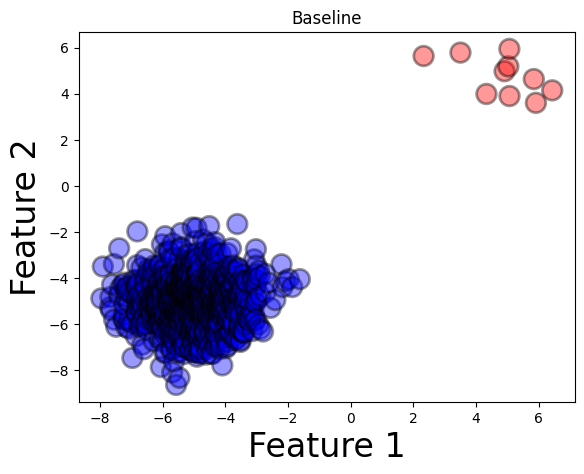

Baseline


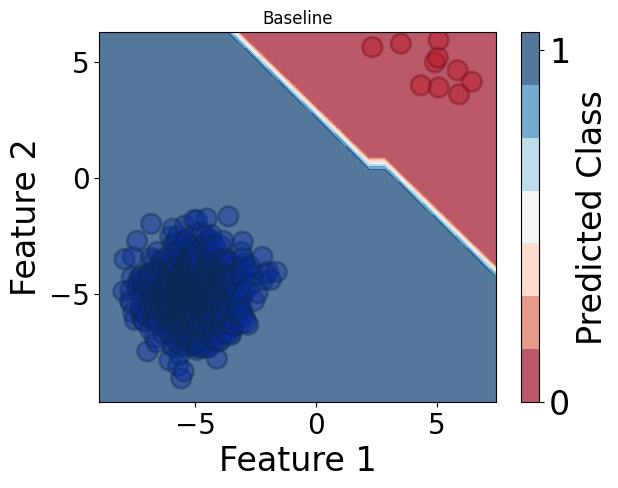

SMOTE


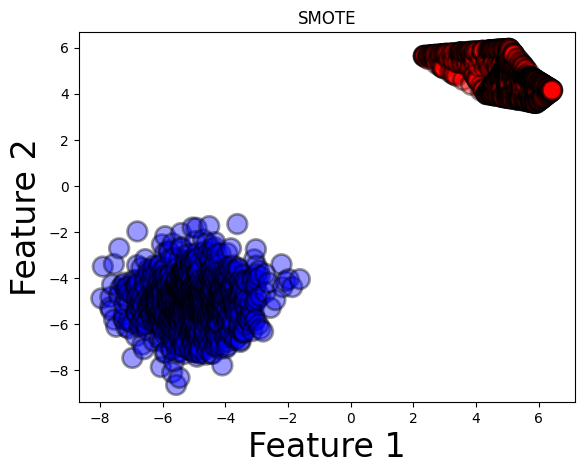

SMOTE


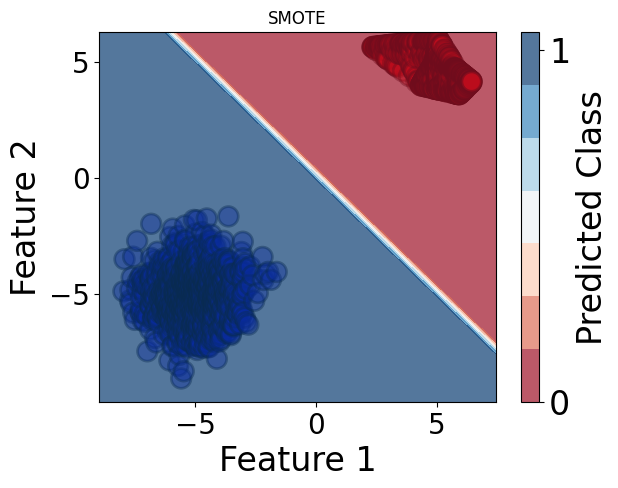

Balanced Weights


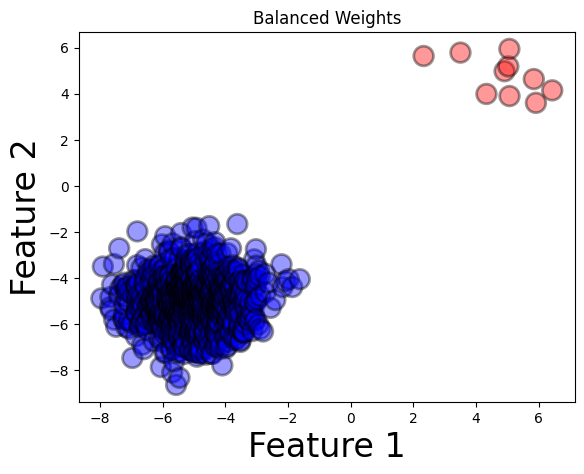

Balanced Weights


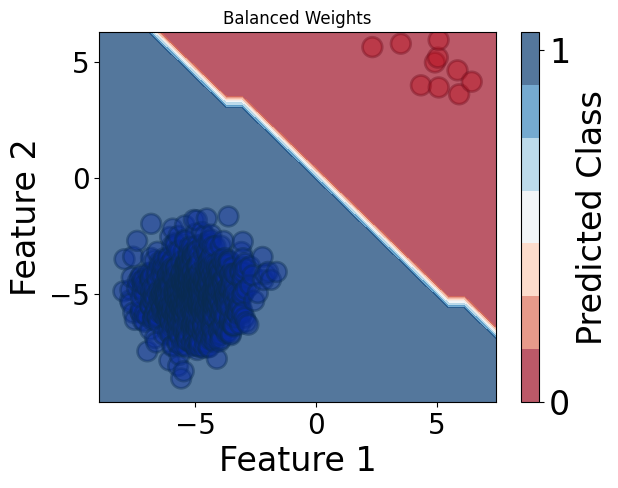

BMR


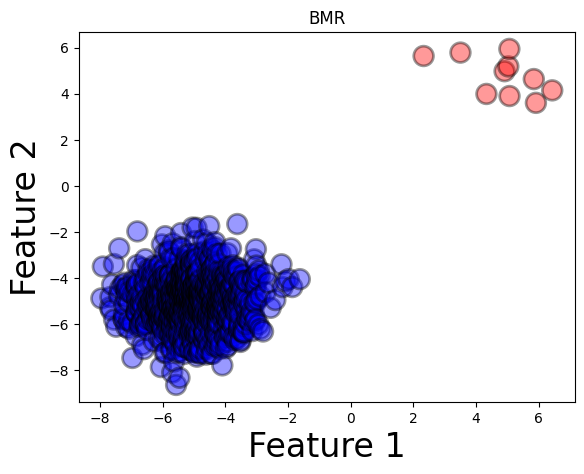

BMR


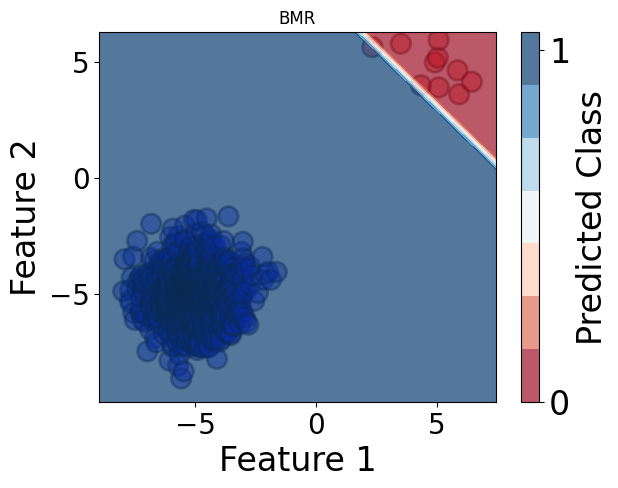

Threshold


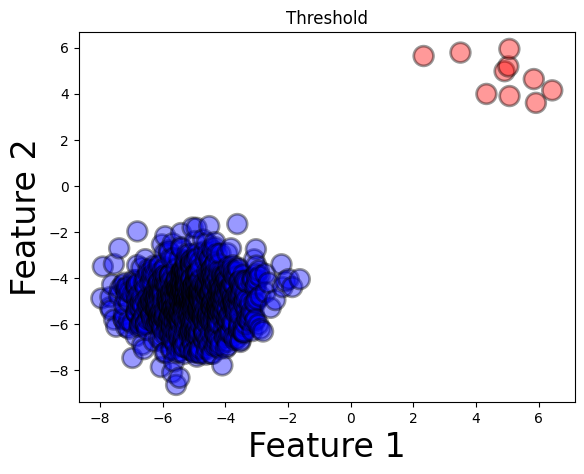

Threshold


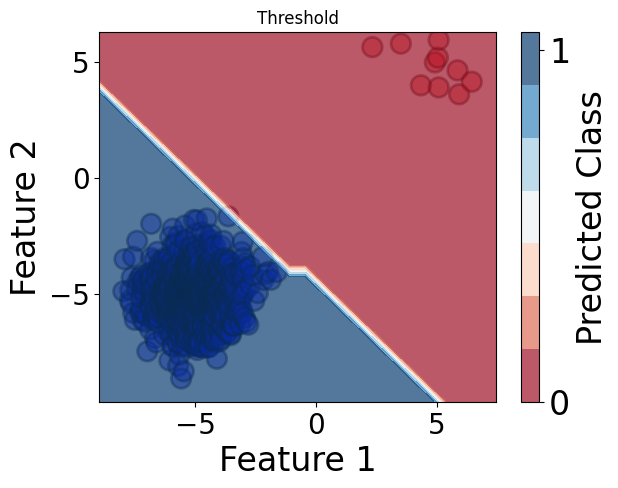

In [14]:
model = 'SVM-linear'
# model = 'SVM-rbf'
model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf,
                      _plot_data=True)
data_clf['clf'] = classifiers_dict['Baseline']        

## Fit deltas

Original Data
plotting training data as data input


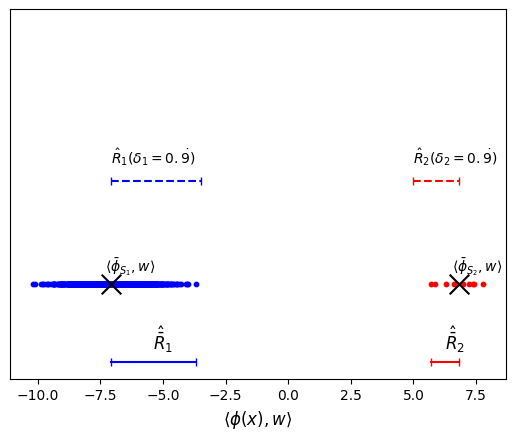

Original dataset is solvable so not downsampling, set 'force_downsample' to 'True' to try and find a lower loss via downsampling anyway
Original Data:


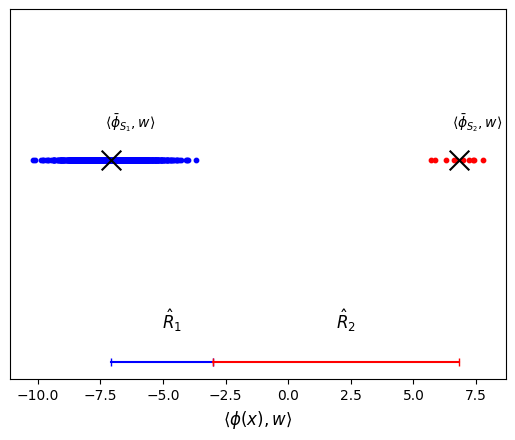

In [15]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
deltas_model = downsample.downsample_deltas(
    clf).fit(X, y, _print=True, _plot=True, grid_search=True)

## Plot training data information

plotting training data as data input


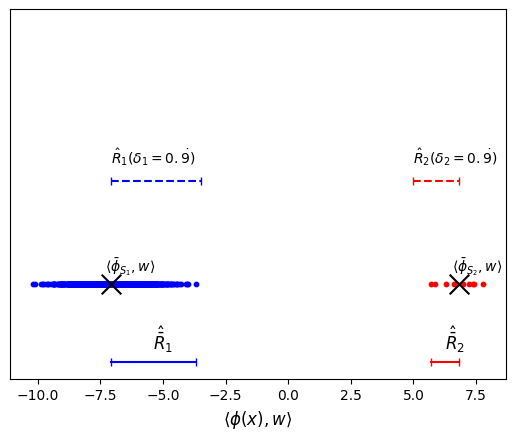

In [16]:
deltas_model.plot_data(data_clf['clf'])

## See how classifier's boudnary changes with delta

interactive(children=(FloatSlider(value=1.0, description='delta2', max=1.0, min=1e-05, step=1e-05), Button(des…

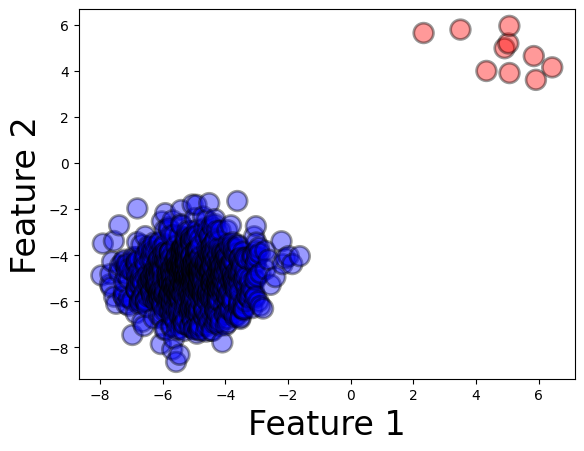

In [17]:
@ipywidgets.interact_manual(
    delta2=(0.00001, 1., 0.00001),
)
def plot(delta2=1):
    ax, _ = plots._get_axes(None)
    plots.plot_classes(data_clf['data'], ax=ax)
    def pred_func(X): return deltas_model._predict_given_delta2(X, delta2)
    plots.plot_decision_boundary_custom_pred(
        pred_func, data_clf['data'], ax=ax, probs=False)
    ax.set_title(f'delta_class0 = {delta2}')
    plots.plt.show()

## Show parameters

In [18]:
deltas_model.print_params()

Parameters
                R:  10.206381804253134
                N1: 1000
                N2: 10
                R1: 3.3909482010653322
                R2: 1.1105659239920236
                M:  9.376860902451291
                D:  13.878375027508646
                C1: 1
                C2: 1


# Evaluation on test data

                  Accuracy    G-Mean        F1
Method                                        
Baseline            1.0000  1.000000  1.000000
SMOTE               1.0000  1.000000  1.000000
Balanced Weights    1.0000  1.000000  1.000000
BMR                 0.9615  0.960729  0.959958
Threshold           1.0000  1.000000  1.000000
Our Method          1.0000  1.000000  1.000000 


Baseline


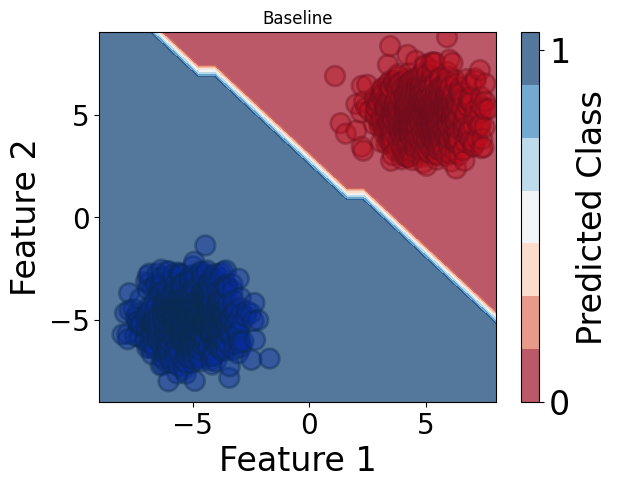

SMOTE


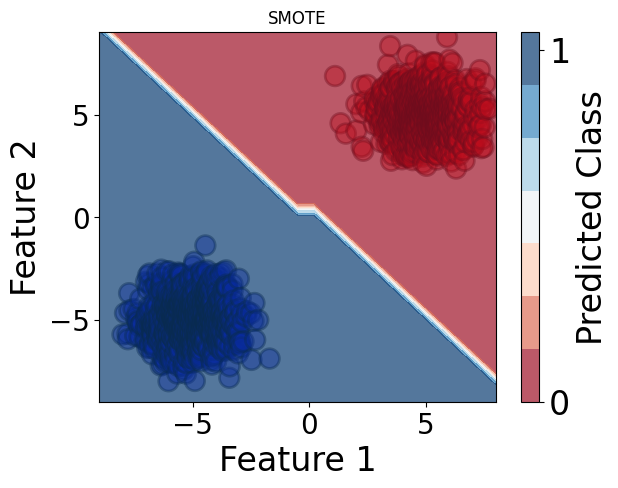

Balanced Weights


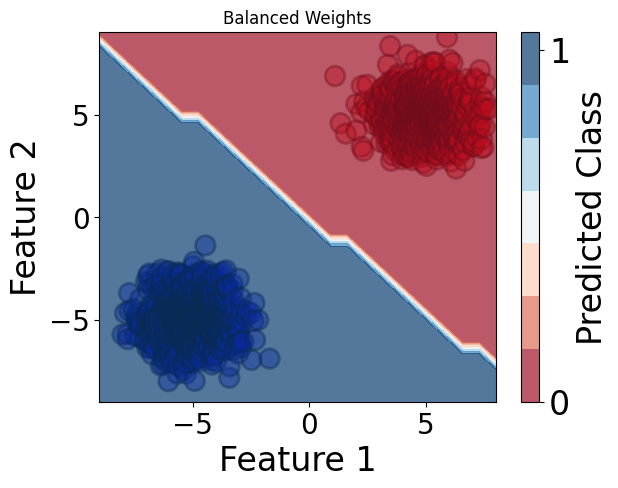

BMR


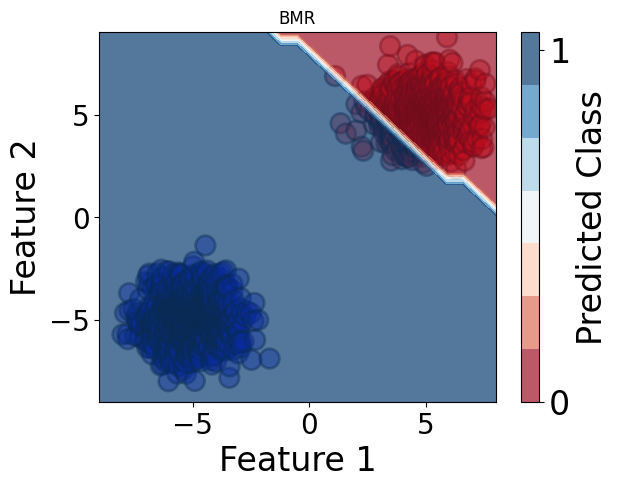

Threshold


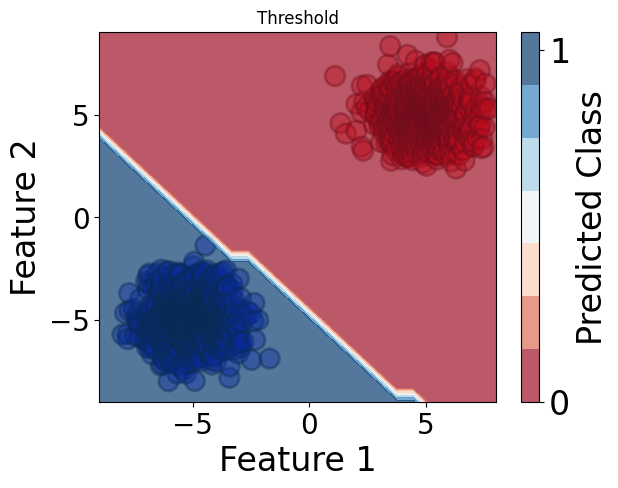

Our Method


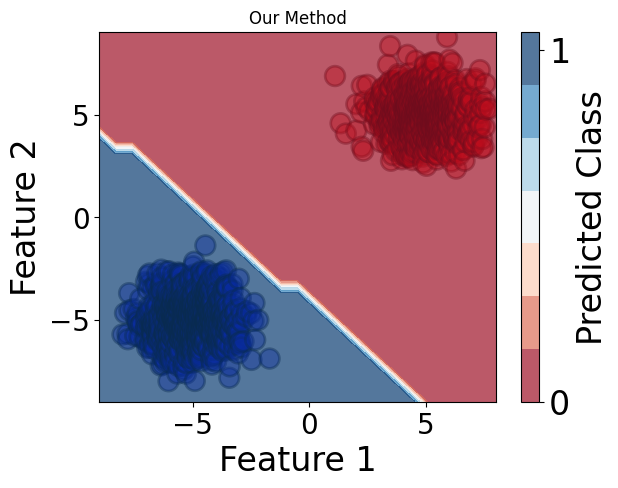

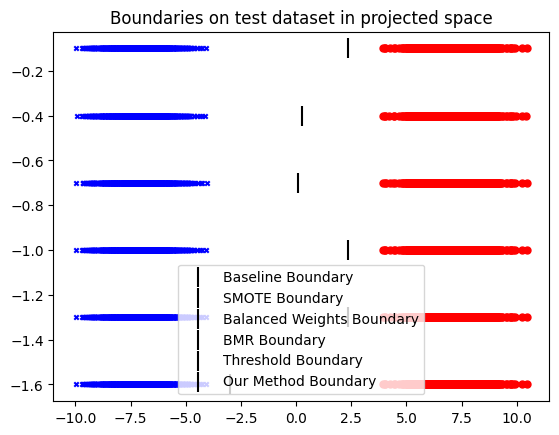

,Accuracy,G-Mean,F1
Method,,,
Baseline,1.0000,1.000000,1.000000
SMOTE,1.0000,1.000000,1.000000
Balanced Weights,1.0000,1.000000,1.000000
BMR,0.9615,0.960729,0.959958
Threshold,1.0000,1.000000,1.000000
Our Method,1.0000,1.000000,1.000000


In [19]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict,
                       data_clf['data_test'], _print=True, _plot=True)